<a href="https://colab.research.google.com/github/naralakamsani/reinforcment_learning/blob/main/blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
!wget -q https://github.com/jlm429/bettermdptools/raw/master/examples/blackjack-envP

In [ ]:
%pip -q install gymnasium
%pip -q install bettermdptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import math

import gymnasium as gym
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
from examples.plots import Plots

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib.colors import ListedColormap

import time

from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from gymnasium.wrappers import TransformReward

import os

import pickle

# Plots

In [ ]:
def visualize_policy(policy, values, title, usable_ace = False, cbar_label = "State Value"):

  if not usable_ace:
      player_count, dealer_count = np.meshgrid(
      np.arange(12, 22),
      np.arange(1, 11),
      )
  else:
    player_count, dealer_count = np.meshgrid(
    np.arange(12, 22),
    np.arange(1, 11),
    )

  value_grid = np.apply_along_axis(
      lambda obs: values[convert_state_obs((obs[0], obs[1], usable_ace),0)],
      axis=2,
      arr=np.dstack([player_count, dealer_count]),
  )

  policy_grid = np.apply_along_axis(
      lambda obs: policy(convert_state_obs((obs[0], obs[1], usable_ace),0)),
      axis=2,
      arr=np.dstack([player_count, dealer_count]),
  )

  fig, ax = plt.subplots()
  cax = ax.matshow(value_grid, cmap='viridis')

  ax.set_title(title+"\n O = Hit, X = Stick")

  plt.colorbar(cax).set_label(cbar_label)

  for i in range(len(policy_grid)):
      for j in range(len(policy_grid[i])):
        if policy_grid[i][j] == 1:
          ax.text(j, i, "0", ha='center', va='center', color='black', label='Hit')
        else:
          ax.text(j, i, "X", ha='center', va='center', color='red', label='Stick')

  ax.set_xlabel("Player Sum (Has Usable Ace)" if usable_ace else "Player Sum (NO Usable Ace)")
  ax.set_ylabel("Dealer Showing")

  ax.set_xticks(range(len(player_count[0])))
  ax.set_xticklabels(player_count[0])
  ax.xaxis.set_ticks_position('bottom')

  ax.set_yticks(range(len(dealer_count)))
  ax.set_yticklabels(["A"] + list(range(2, 11)))

  plt.grid(False)

  plt.show()

In [ ]:
def plot_v_iters(all_tracked_values, param_values, param_name, title, y_label='State Value'):
  for tracked_values, param in zip(all_tracked_values,param_values):
    max_value_per_iter = np.amax(tracked_values, axis=1)
    plt.plot(max_value_per_iter, label=f'{param_name} = {param}')

  plt.title(f'{title}: Max {y_label}')
  plt.xlabel('Iteration')
  plt.ylabel(f'Max {y_label}')
  plt.legend()
  plt.grid(True)
  plt.show()

  for tracked_values, param in zip(all_tracked_values,param_values):
    mean_value_per_iter = np.mean(tracked_values, axis=1)
    plt.plot(mean_value_per_iter, label=f'{param_name} = {param}')

  plt.title(f'{title}: Mean {y_label}')
  plt.xlabel('Iteration')
  plt.ylabel(f'Mean {y_label}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def plot_training_times(training_times, params, param_name, title):
    plt.figure()

    params = [str(param) for param in params]

    plt.bar(params, training_times)

    plt.ylabel('Runtime (seconds)')
    plt.xlabel(param_name)
    plt.title(title)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Value Iteration

## Policy

runtime = 0.03 seconds


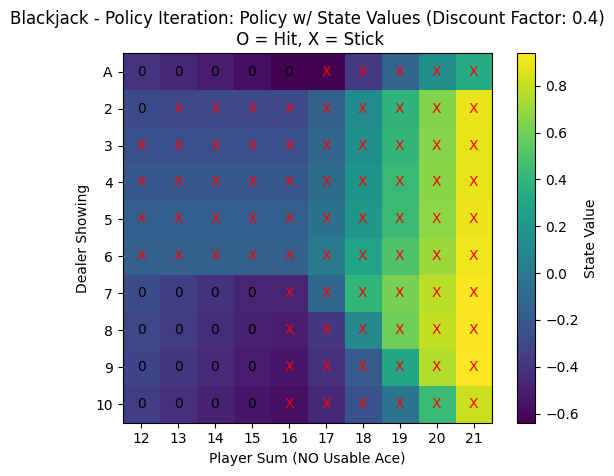

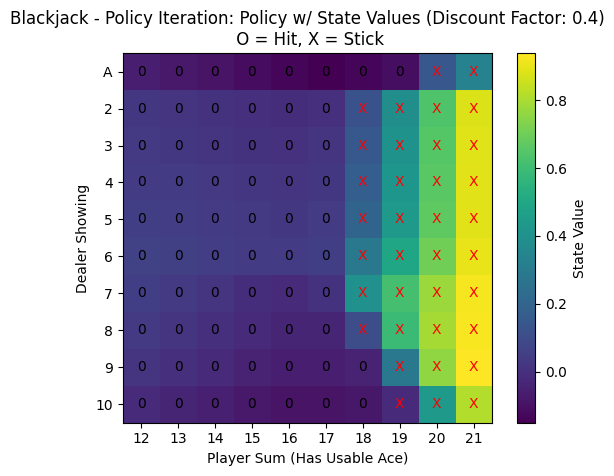

runtime = 0.06 seconds


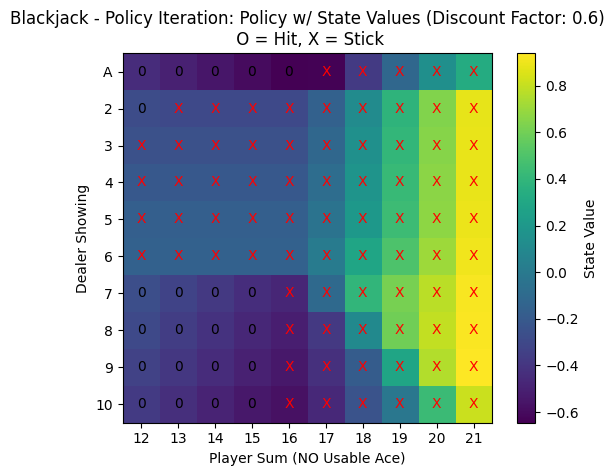

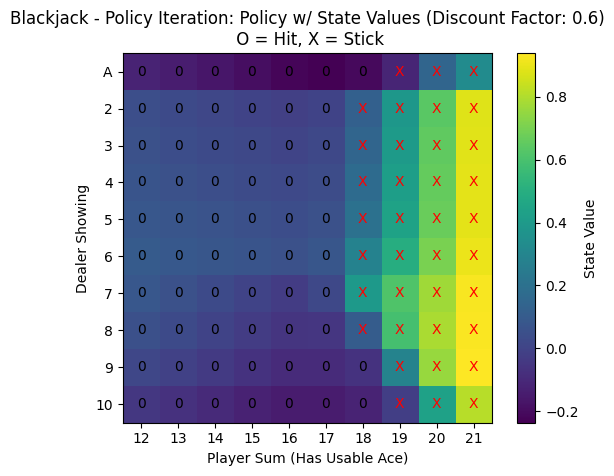

runtime = 0.05 seconds


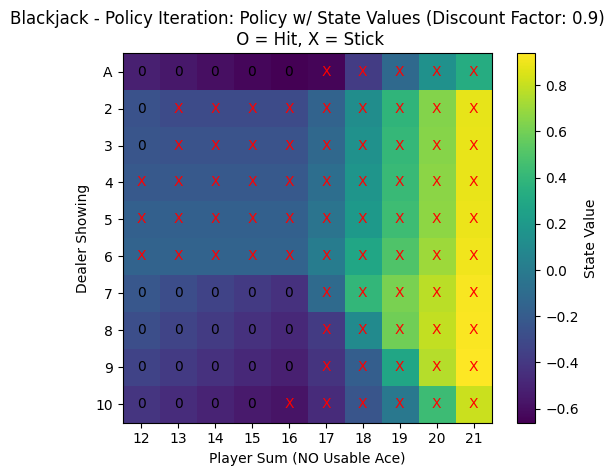

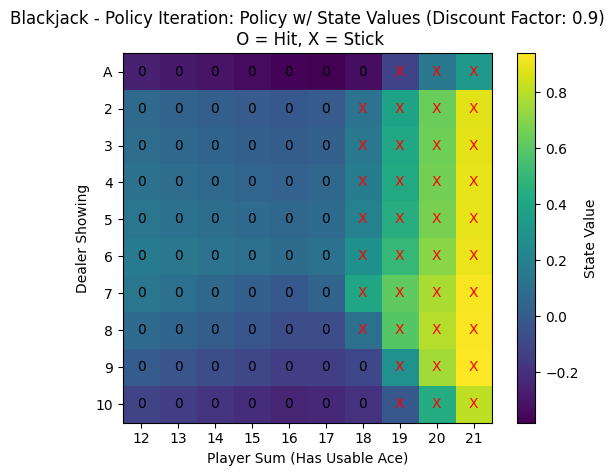

runtime = 0.05 seconds


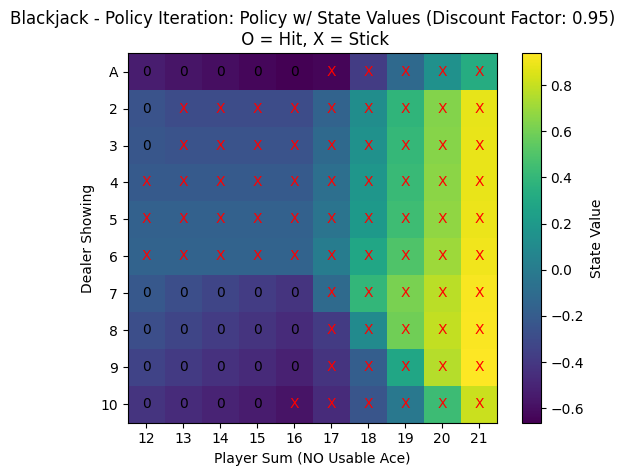

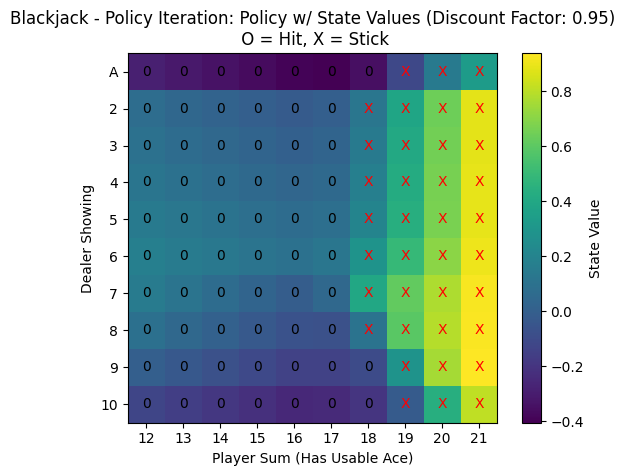

runtime = 0.05 seconds


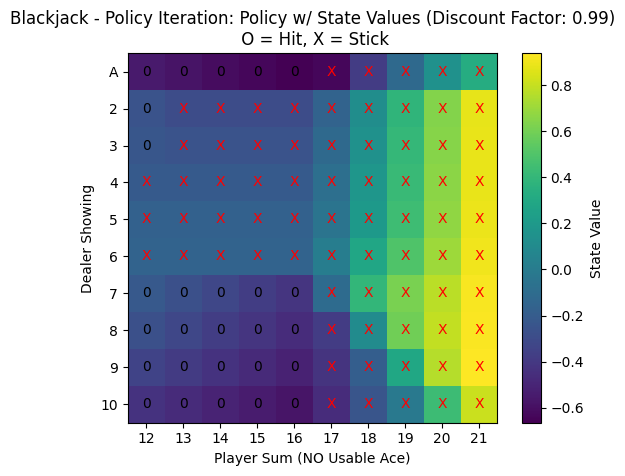

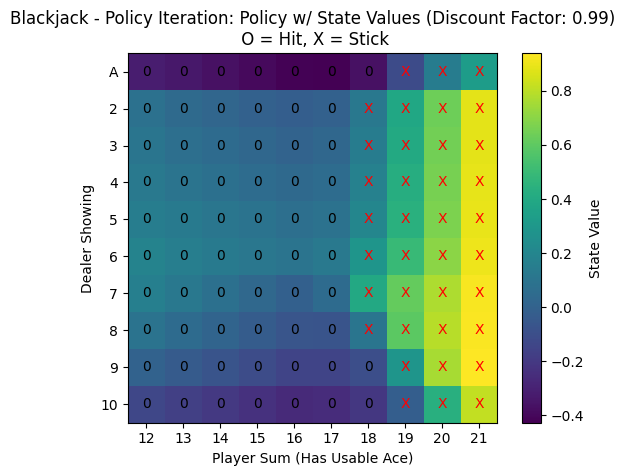

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')

convert_state_obs = lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))

try:
    blackjack.unwrapped.P = pickle.load(open('blackjack-envP', "rb"))
except IOError:
    print("Pickle load failed.  Check path", file_name)

vi_gammas = [0.4,0.6,0.9,0.95,0.99]

vi_gammas_tracked_values = []

vi_gammas_runtimes = []

for gamma in vi_gammas:

  start = time.time()

  V, V_track, pi = Planner(blackjack.unwrapped.P).value_iteration(gamma=gamma, n_iters=15, theta=1e-10)

  end = time.time()
  running_time = end - start

  vi_gammas_runtimes.append(running_time)

  vi_gammas_tracked_values.append(V_track)

  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = False, cbar_label = "State Value")
  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = True, cbar_label = "State Value")

## Convergence

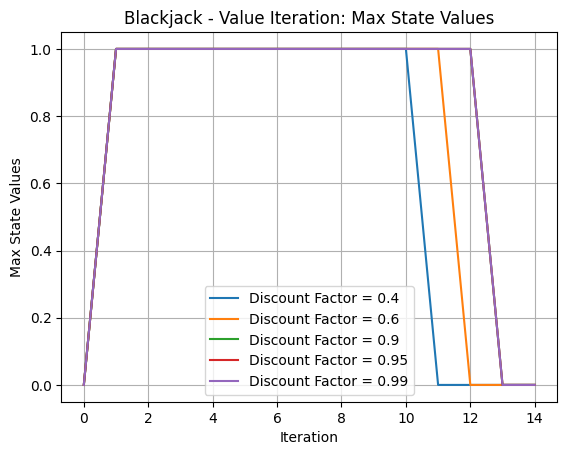

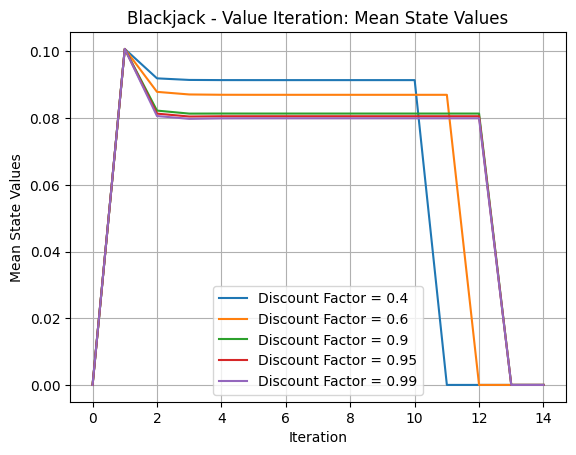

In [ ]:
plot_v_iters(vi_gammas_tracked_values, vi_gammas, "Discount Factor", "Blackjack - Value Iteration", y_label='State Values')

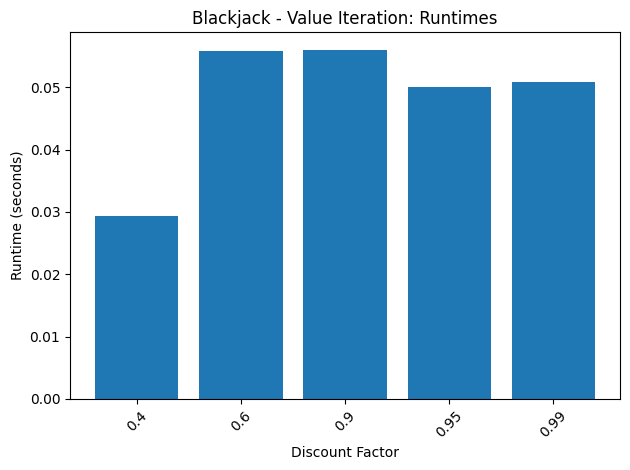

In [ ]:
plot_training_times(vi_gammas_runtimes, vi_gammas, "Discount Factor", "Blackjack - Value Iteration: Runtimes")

# Policy Iteration

## Policy

runtime = 0.98 seconds


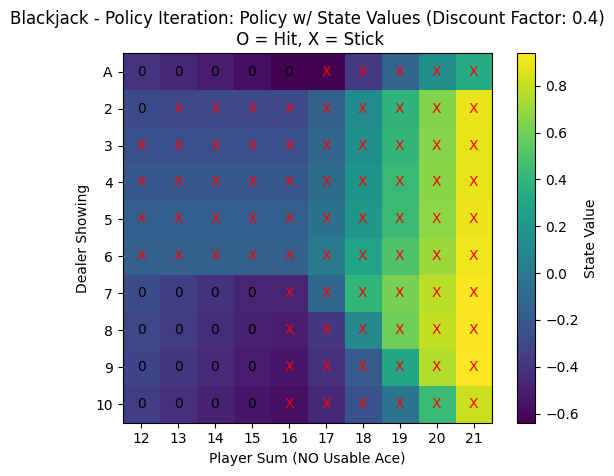

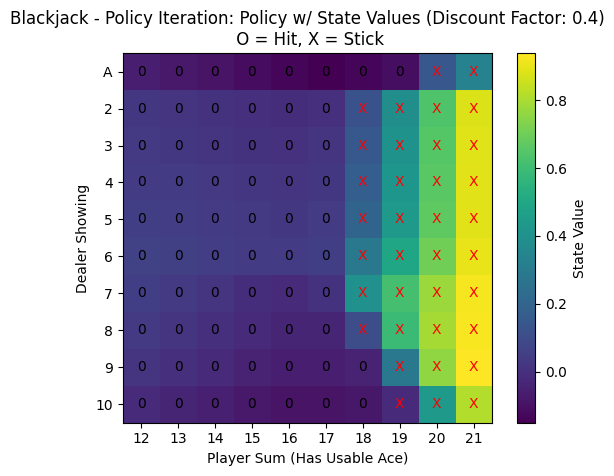

runtime = 0.95 seconds


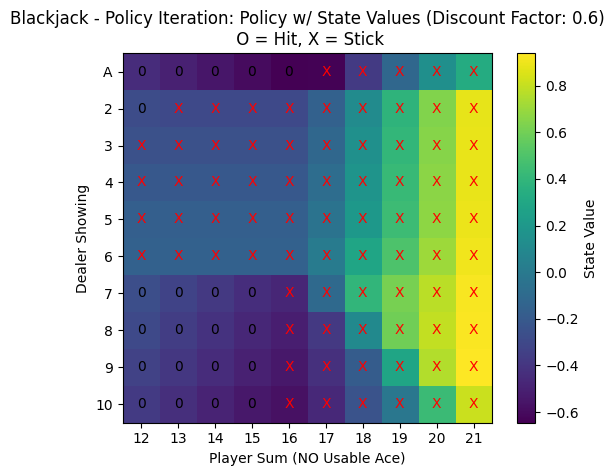

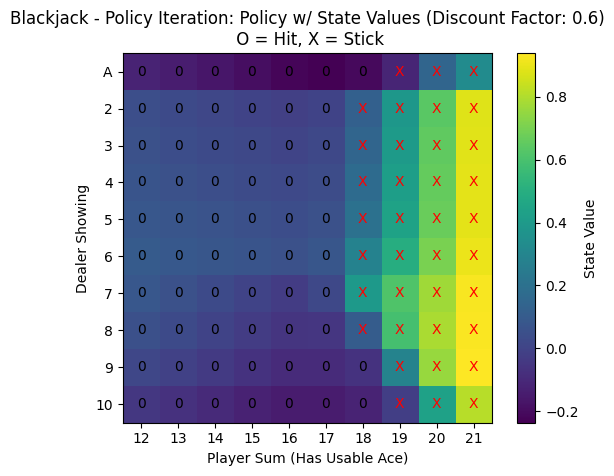

runtime = 0.68 seconds


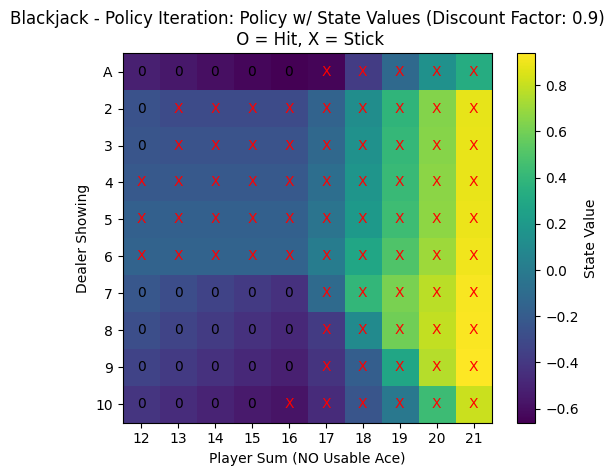

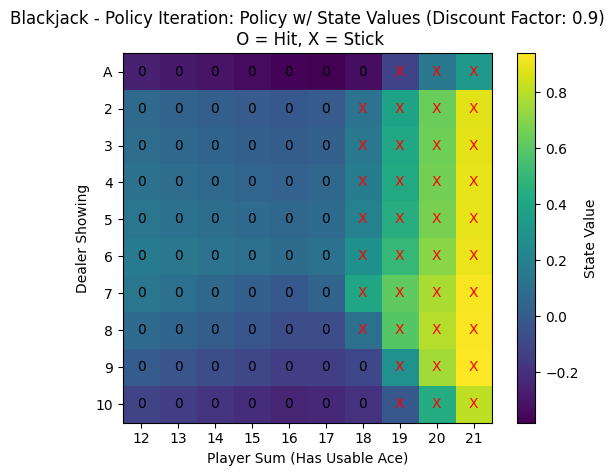

runtime = 0.69 seconds


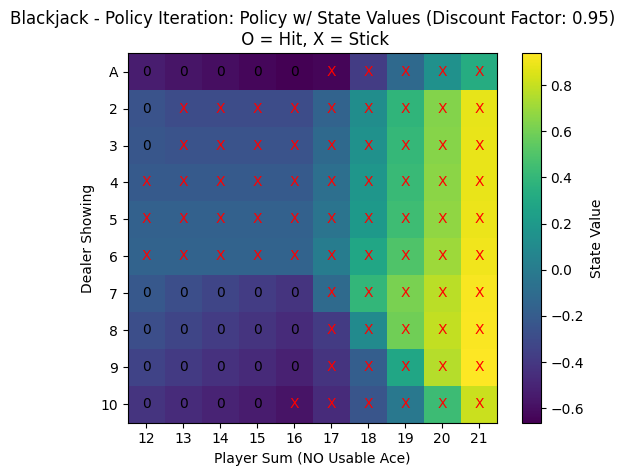

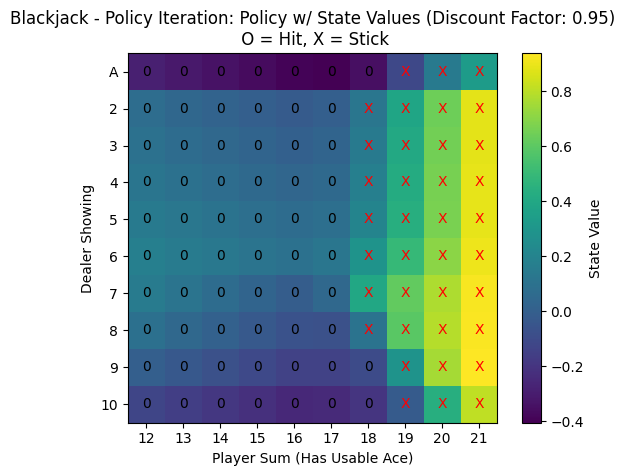

runtime = 0.68 seconds


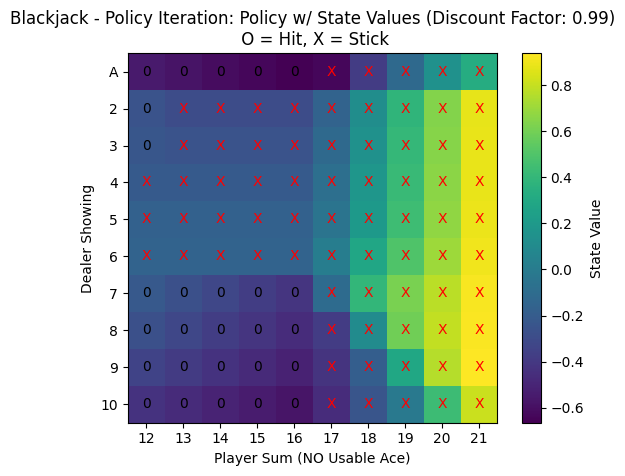

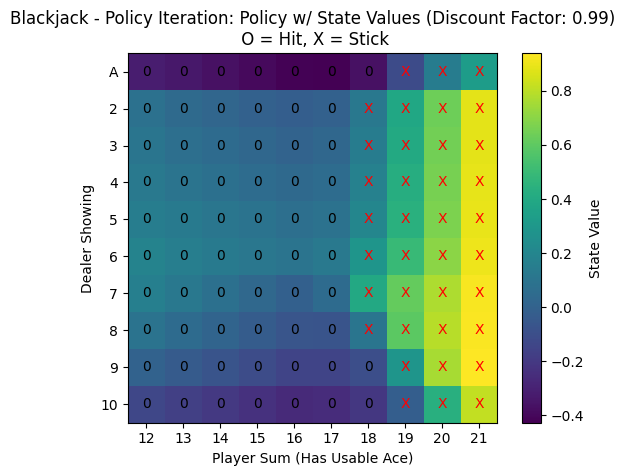

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')

convert_state_obs = lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))

try:
    blackjack.unwrapped.P = pickle.load(open('blackjack-envP', "rb"))
except IOError:
    print("Pickle load failed.  Check path", file_name)

pi_gammas = [0.4,0.6,0.9,0.95,0.99]

pi_gammas_tracked_values = []

pi_gammas_runtimes = []

for gamma in pi_gammas:

  start = time.time()

  V, V_track, pi = Planner(blackjack.unwrapped.P).policy_iteration(gamma=gamma, n_iters=7, theta=1e-10)

  end = time.time()
  running_time = end - start

  pi_gammas_runtimes.append(running_time)

  pi_gammas_tracked_values.append(V_track)

  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = False, cbar_label = "State Value")
  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = True, cbar_label = "State Value")

## Convergence

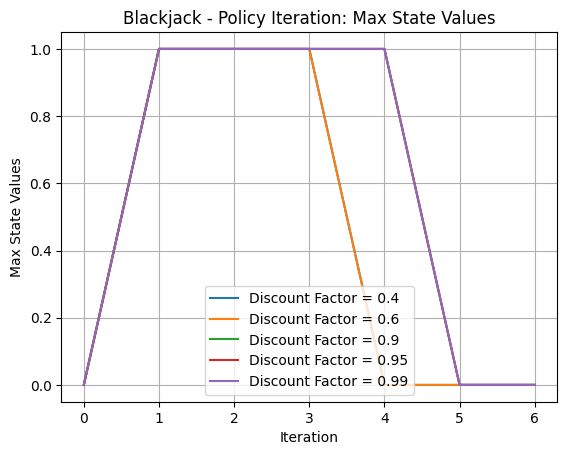

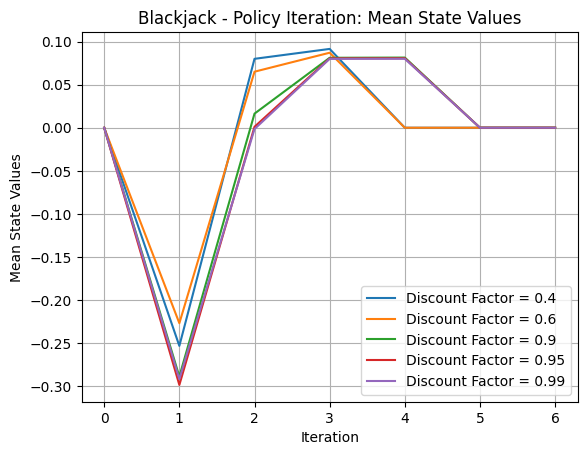

In [ ]:
plot_v_iters(pi_gammas_tracked_values, pi_gammas, "Discount Factor", "Blackjack - Policy Iteration", y_label='State Values')

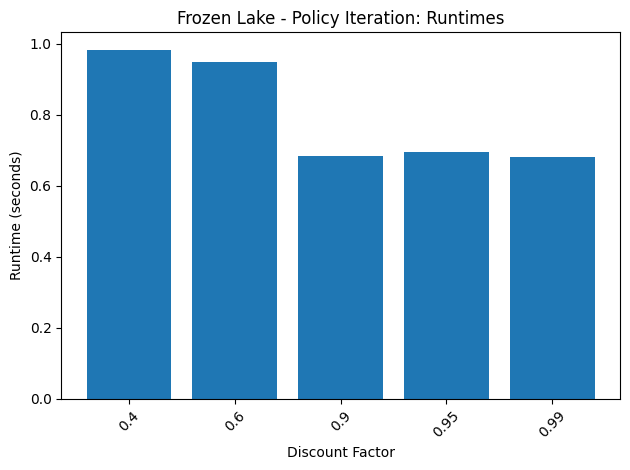

In [ ]:
plot_training_times(pi_gammas_runtimes, pi_gammas, "Discount Factor", "Blackjack - Policy Iteration: Runtimes")

# Q-Learning

## Policy

runtime = 22.72 seconds


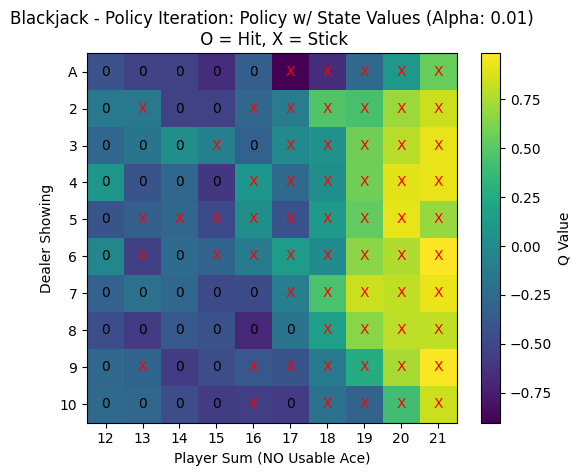

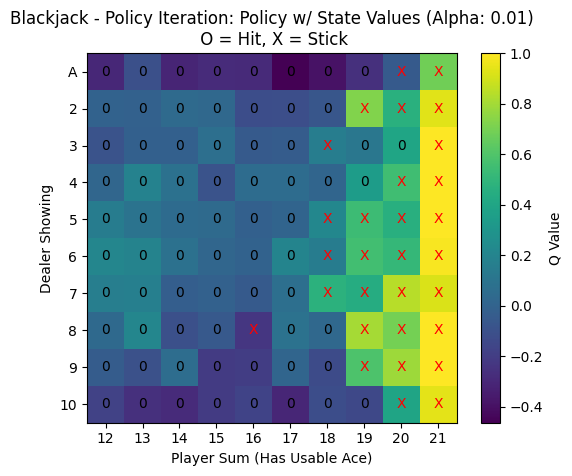

runtime = 22.29 seconds


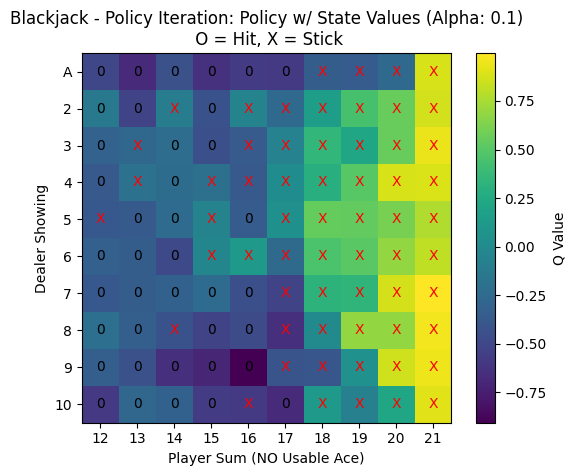

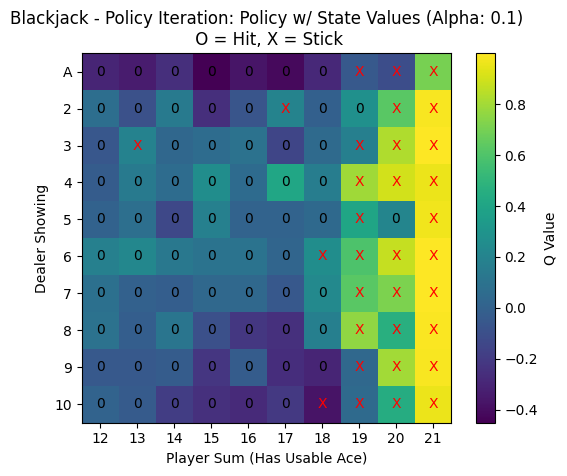

runtime = 22.18 seconds


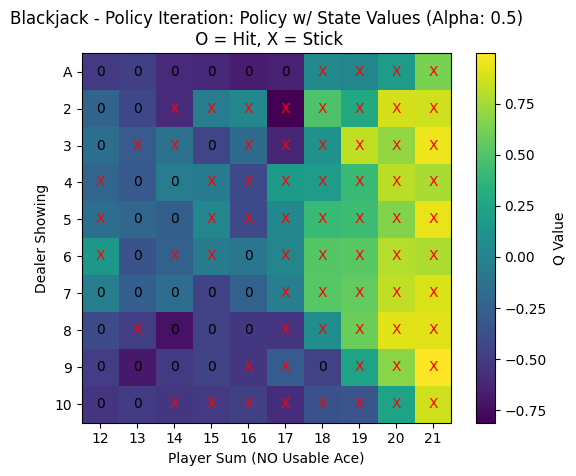

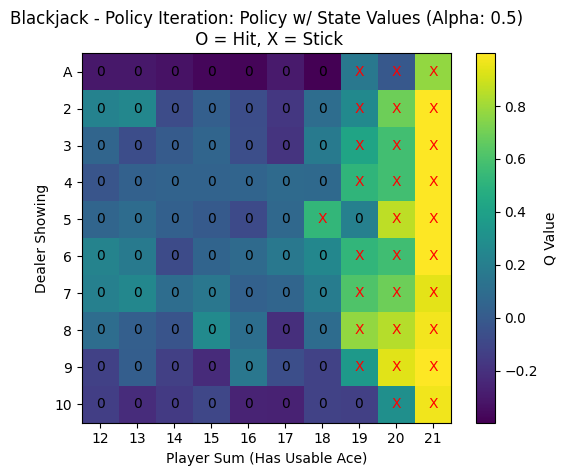

runtime = 21.55 seconds


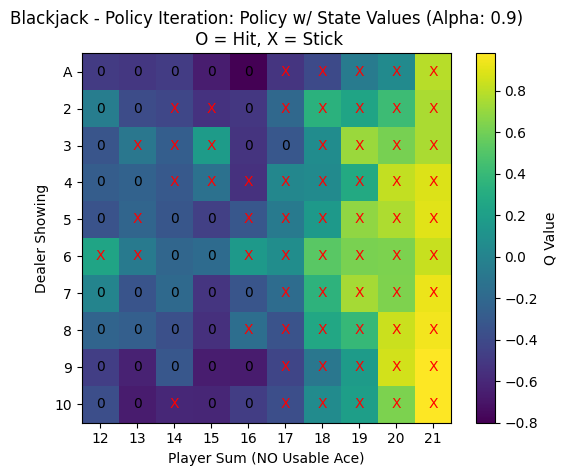

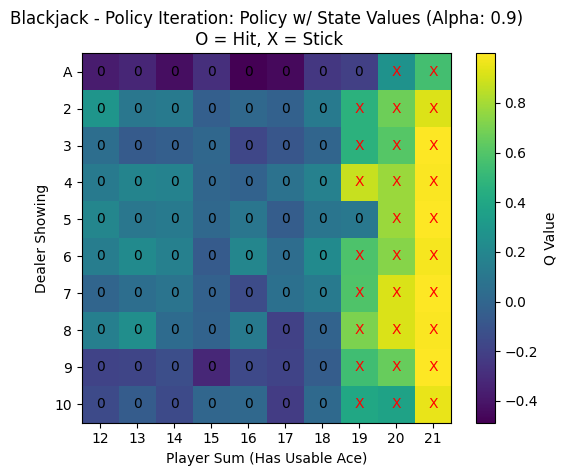

runtime = 21.43 seconds


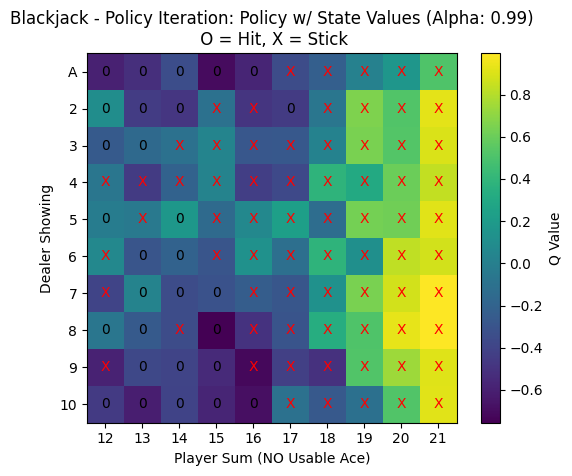

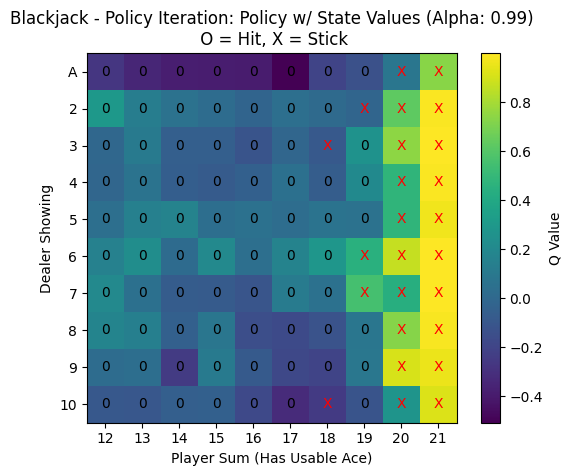

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')
nS=290
nA=2
convert_state_obs=lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))

q_alphas = [0.01, 0.1, 0.5, 0.9, 0.99]

q_alphas_tracked_values = []

q_alphas_runtimes = []

for alpha in q_alphas:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(
                                                        nS=nS,
                                                        nA=nA,
                                                        convert_state_obs=convert_state_obs,
                                                        gamma=0.99,
                                                        init_alpha=0.05,
                                                        min_alpha=0.001,
                                                        alpha_decay_ratio=0.999,
                                                        init_epsilon=1,
                                                        min_epsilon=epsilon,
                                                        epsilon_decay_ratio=0.9999,
                                                        n_episodes=500000)
  end = time.time()
  running_time = end - start

  q_alphas_runtimes.append(running_time)

  q_alphas_tracked_values.append(np.amax(Q_track, axis=2))


  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Alpha: {})".format(alpha), usable_ace = False, cbar_label = "Q Value")
  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Alpha: {})".format(alpha), usable_ace = True, cbar_label = "Q Value")

runtime = 21.12 seconds


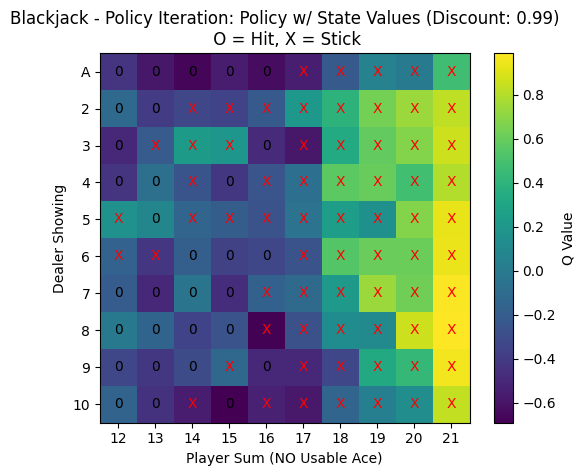

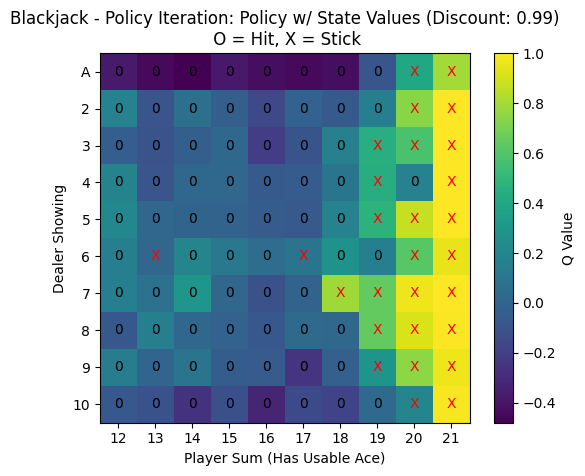

runtime = 22.75 seconds


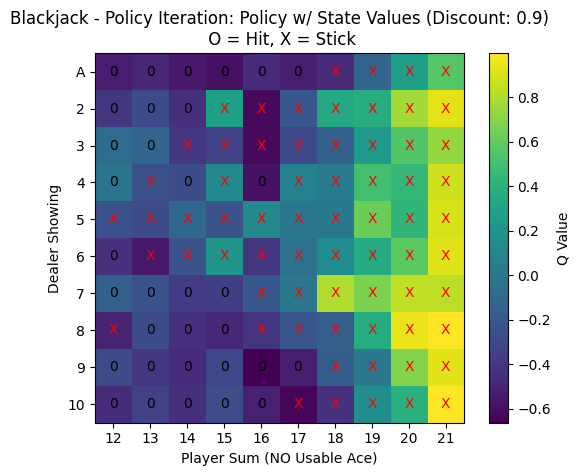

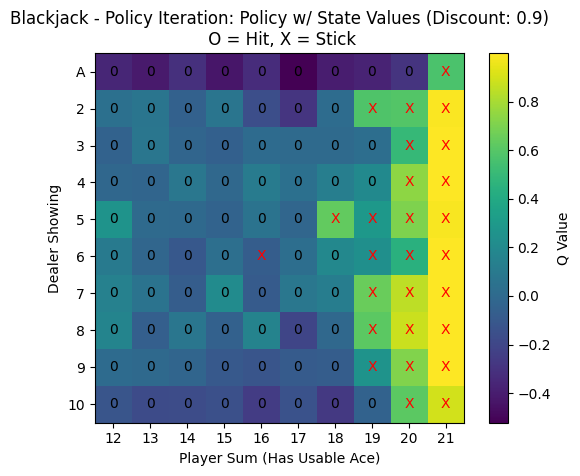

runtime = 22.36 seconds


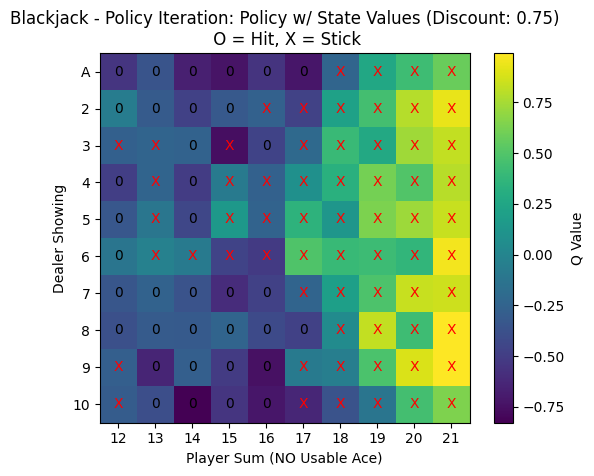

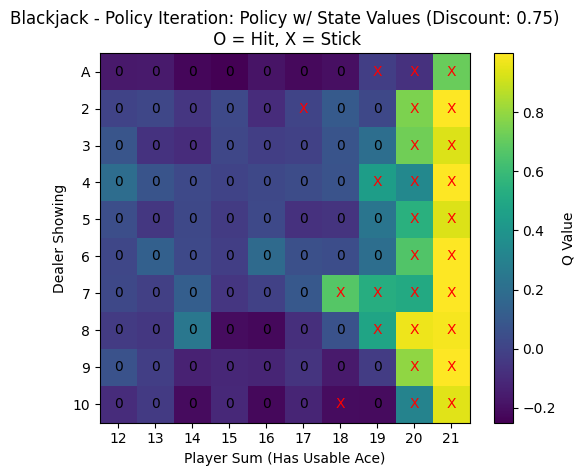

runtime = 22.39 seconds


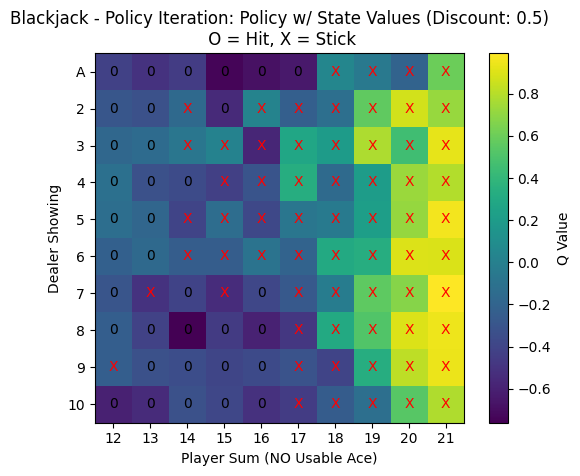

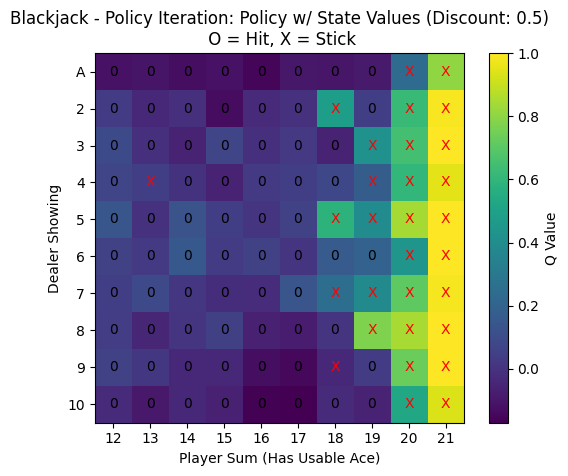

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')
nS=290
nA=2
convert_state_obs=lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))


q_gammas = [0.99,0.9,0.75,0.5]

q_gammas_tracked_values = []

q_gammas_runtimes = []

for gamma in q_gammas:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(nS=nS,
                                                        nA=nA,
                                                        convert_state_obs=convert_state_obs,
                                                        gamma=gamma,
                                                        init_alpha=0.6,
                                                        min_alpha=0.1,
                                                        alpha_decay_ratio=0.99,
                                                        init_epsilon=0.99,
                                                        min_epsilon=0.1,
                                                        epsilon_decay_ratio=0.99,
                                                        n_episodes=100000)
  end = time.time()
  running_time = end - start

  q_gammas_runtimes.append(running_time)

  q_gammas_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount: {})".format(gamma), usable_ace = False, cbar_label = "Q Value")
  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount: {})".format(gamma), usable_ace = True, cbar_label = "Q Value")

runtime = 125.29 seconds


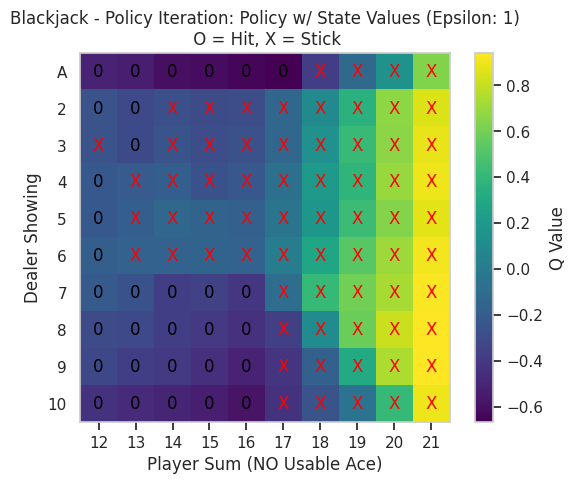

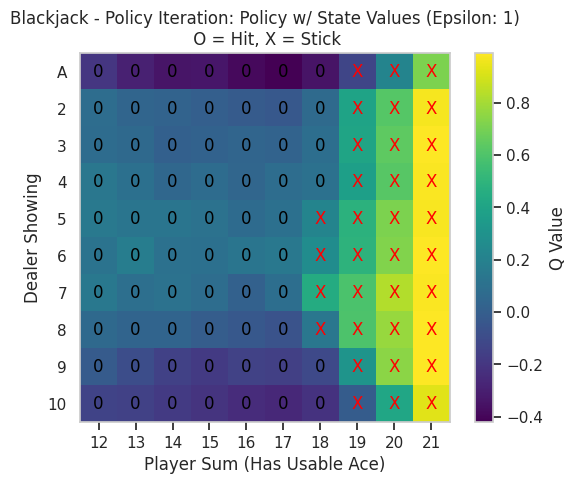

runtime = 118.53 seconds


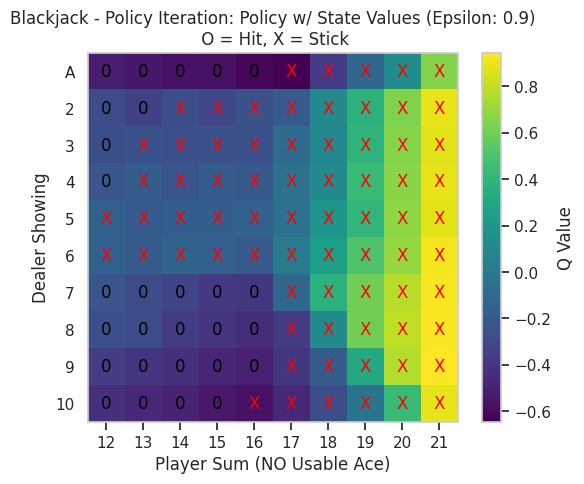

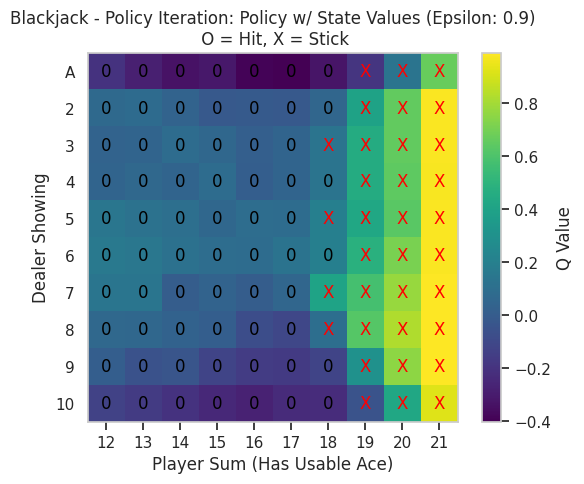

runtime = 116.56 seconds


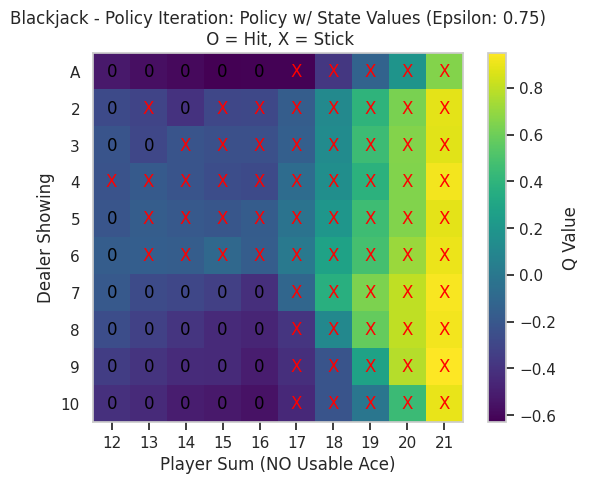

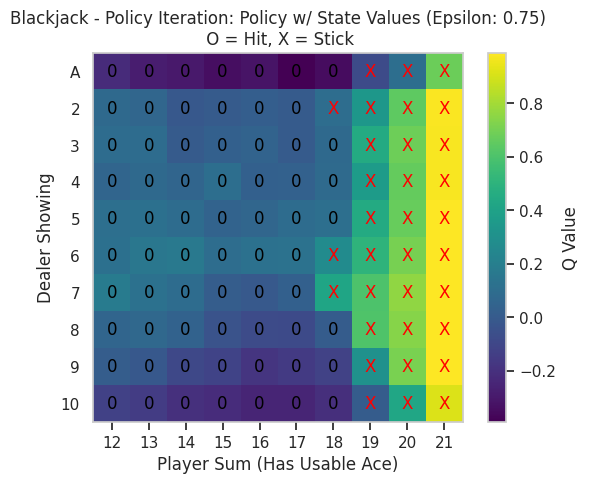

runtime = 123.46 seconds


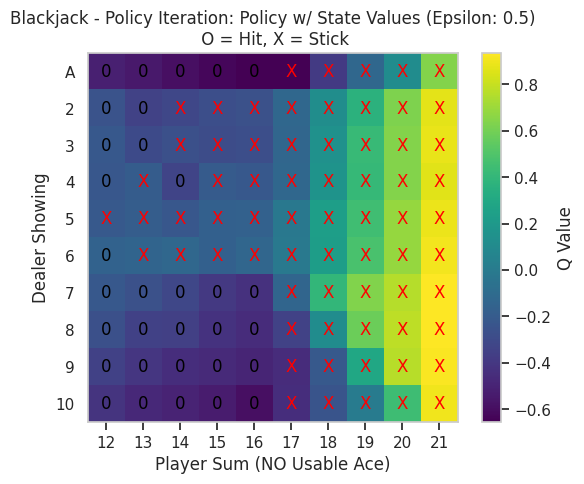

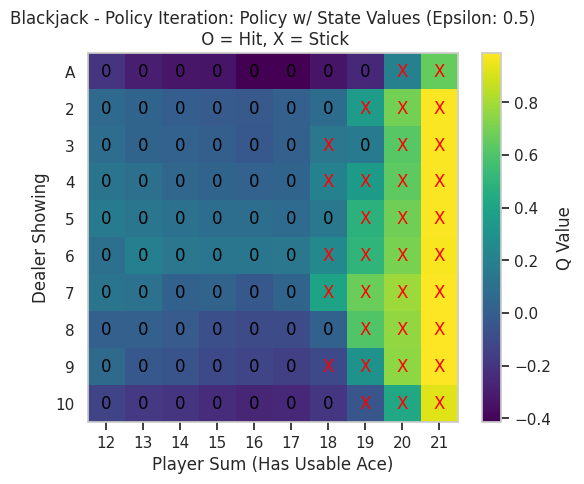

runtime = 123.93 seconds


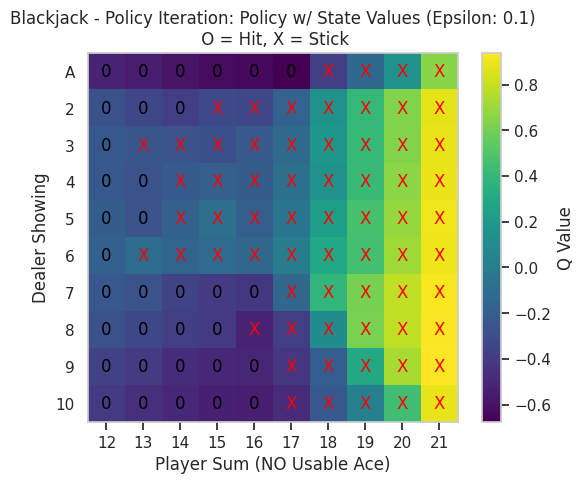

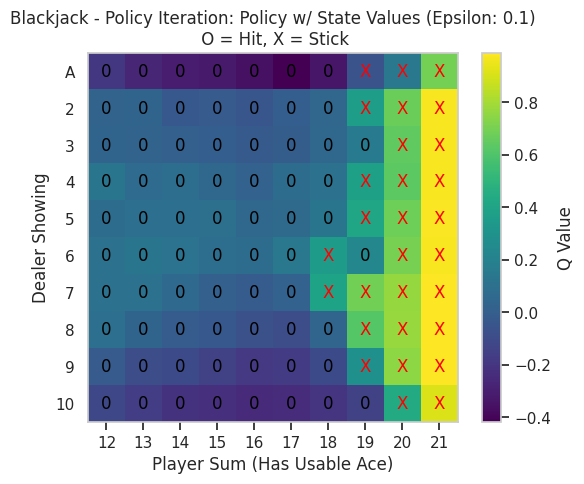

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')
nS=290
nA=2
convert_state_obs=lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))



gamma=0.99
init_alpha=0.05
min_alpha=0.0001
alpha_decay_ratio=0.999
init_epsilon=1
min_epsilon=0.1
epsilon_decay_ratio=0.9999
n_episodes=500_000

q_epsilons = [1,0.9,0.75,0.5,0.1]

q_epsilons_tracked_values = []

q_epsilons_runtimes = []

for epsilon in q_epsilons:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(nS=nS,
                                                        nA=nA,
                                                        convert_state_obs=convert_state_obs,
                                                        gamma=0.99,
                                                        init_alpha=0.05,
                                                        min_alpha=0.001,
                                                        alpha_decay_ratio=0.999,
                                                        init_epsilon=epsilon,
                                                        min_epsilon=0.001,
                                                        epsilon_decay_ratio=0.99975,
                                                        n_episodes=500000)
  end = time.time()
  running_time = end - start

  q_epsilons_runtimes.append(running_time)

  q_epsilons_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Epsilon: {})".format(epsilon), usable_ace = False, cbar_label = "Q Value")
  visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Epsilon: {})".format(epsilon), usable_ace = True, cbar_label = "Q Value")

In [ ]:
blackjack = gym.make('Blackjack-v1', render_mode='rgb_array')

nS=290
nA=2
convert_state_obs=lambda state, done: (-1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))
gamma=0.99
init_alpha=0.05
min_alpha=0.0001
alpha_decay_ratio=0.999
init_epsilon=1
min_epsilon=0.1
epsilon_decay_ratio=1
n_episodes=500_000

print(f" nS={nS}\n nA={nA}\n gamma={gamma}\n init_alpha={init_alpha}\n min_alpha={min_alpha}\n alpha_decay_ratio={alpha_decay_ratio}\n init_epsilon={init_epsilon}\n min_epsilon={min_epsilon}\n epsilon_decay_ratio={epsilon_decay_ratio}\n n_episodes={n_episodes}\n")

Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(nS=nS,
                                                        nA=nA,
                                                        convert_state_obs=convert_state_obs,
                                                        gamma=gamma,
                                                        init_alpha=init_alpha,
                                                        min_alpha=min_alpha,
                                                        alpha_decay_ratio=alpha_decay_ratio,
                                                        init_epsilon=init_epsilon,
                                                        min_epsilon=min_epsilon,
                                                        epsilon_decay_ratio=epsilon_decay_ratio,
                                                        n_episodes=n_episodes)




visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = False, cbar_label = "Q Value")
visualize_policy(pi, V, "Blackjack - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma), usable_ace = True, cbar_label = "Q Value")


max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(max_q_value_per_iter, "Max Q-Values")

mean_q_value_per_iter = np.mean(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(mean_q_value_per_iter, "Mean Q-Values")

 nS=290
 nA=2
 gamma=0.99
 init_alpha=0.05
 min_alpha=0.0001
 alpha_decay_ratio=0.999
 init_epsilon=1
 min_epsilon=0.1
 epsilon_decay_ratio=1
 n_episodes=500000



 59%|█████▉    | 293984/500000 [01:08<00:51, 4003.84it/s]

## Convergence

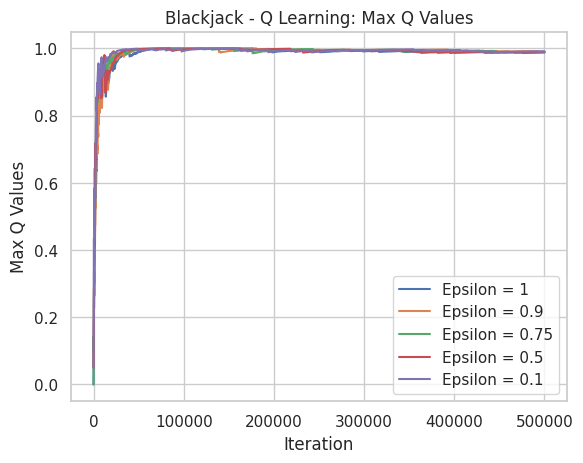

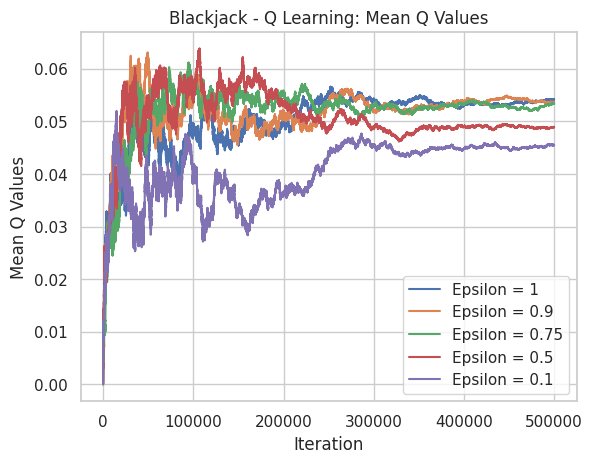

In [ ]:
plot_v_iters(q_epsilons_tracked_values, q_epsilons, "Epsilon", "Blackjack - Q Learning", y_label='Q Values')

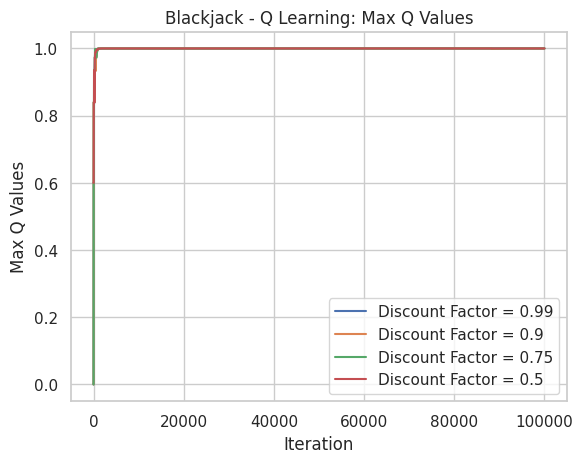

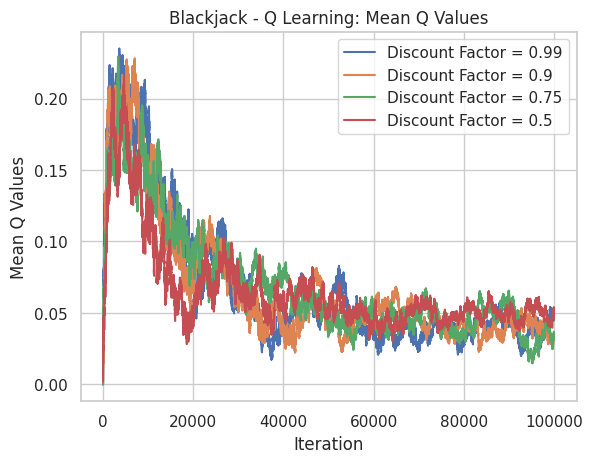

In [ ]:
plot_v_iters(q_gammas_tracked_values, q_gammas, "Discount Factor", "Blackjack - Q Learning", y_label='Q Values')

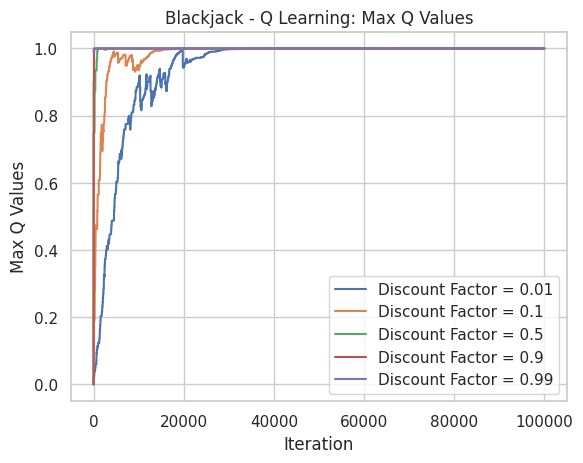

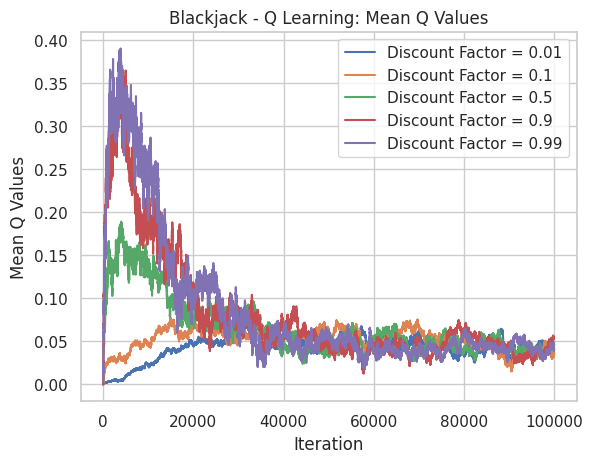

In [ ]:
plot_v_iters(q_alphas_tracked_values, q_alphas, "Discount Factor", "Blackjack - Q Learning", y_label='Q Values')